/tmp/ipykernel_381450/2343945839.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='count', data=label_distribution, palette='viridis', orient='v', order=label_distribution['label'])
/tmp/ipykernel_381450/2343945839.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(label_distribution["label"], rotation=45, ha='right')  # Set xticks for spacing


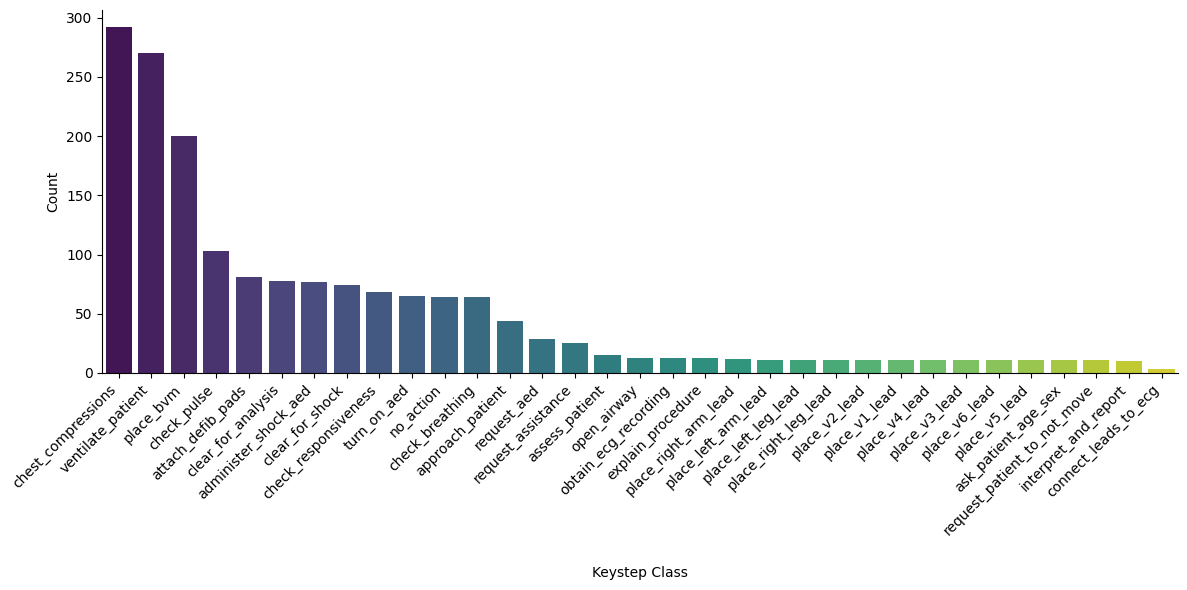

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
label_distribution = pd.read_csv('./keystep_distribution_by_label.csv').sort_values(by='count', ascending=False)
class_distribution = pd.read_csv('./keystep_distribution_by_class_id.csv').sort_values(by='count', ascending=False)
length_stats_by_label = pd.read_csv('./keystep_length_stats_by_label.csv').sort_values(by='average_length', ascending=False)
length_stats_by_class = pd.read_csv('./keystep_length_stats_by_class_id.csv').sort_values(by='average_length', ascending=False)

# Plot Keystep Distribution by Label
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='count', data=label_distribution, palette='viridis', orient='v', order=label_distribution['label'])
# plt.title('Keystep Distribution by Label')
plt.xlabel('Keystep Class')
plt.ylabel('Count')
sns.despine()
# Rotate x-axis labels for readability and set spacing
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.labelpad = 20  # Adjust space between bars
plt.gca().set_xticklabels(label_distribution["label"], rotation=45, ha='right')  # Set xticks for spacing

plt.savefig("./plots/keystep_distribution_count.png", dpi=300, bbox_inches='tight')

# Adjust x-axis ticks to display every 2nd label for clarity
plt.tight_layout()
plt.show()



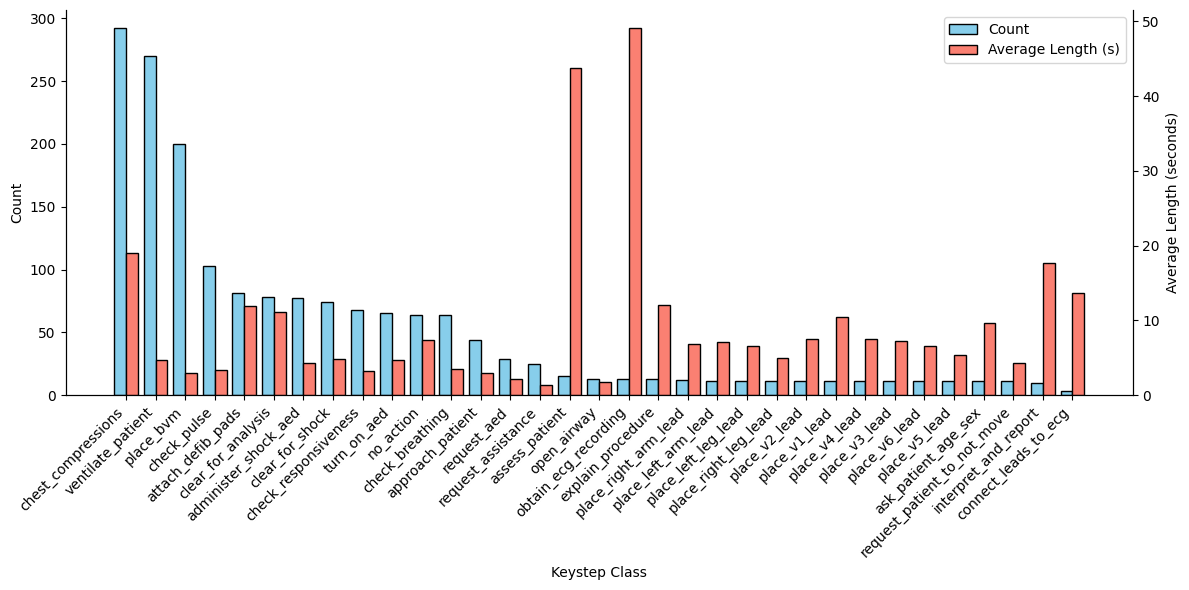

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
label_distribution = pd.read_csv('./keystep_distribution_by_label.csv').sort_values(by='count', ascending=False)
length_stats_by_label = pd.read_csv('./keystep_length_stats_by_label.csv').sort_values(by='average_length', ascending=False)

# Merge dataframes on the 'label' column
merged_data = pd.merge(label_distribution, length_stats_by_label, on='label')

# Set up the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Width of each bar for side-by-side placement
bar_width = 0.4
x = range(len(merged_data))

# Plot count bars on the primary y-axis (left)
ax1.bar([i - bar_width / 2 for i in x], merged_data['count'], width=bar_width, color='skyblue', 
        edgecolor='black', label='Count')
ax1.set_xlabel('Keystep Class')
ax1.set_ylabel('Count')
ax1.set_xticks(x)
ax1.set_xticklabels(merged_data['label'], rotation=45, ha='right')
ax1.tick_params(axis='y')

# Plot average length bars on the secondary y-axis (right)
ax2 = ax1.twinx()
ax2.bar([i + bar_width / 2 for i in x], merged_data['average_length'], width=bar_width, color='salmon', 
        edgecolor='black', label='Average Length (s)')
ax2.set_ylabel('Average Length (seconds)')
ax2.tick_params(axis='y')

# hide top spine
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add legends for both bars
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.savefig("./plots/keystep_distribution_count_length_side_by_side.png", dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_381450/1956408981.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(data["label"], rotation=45, ha='right')  # Set xticks for spacing


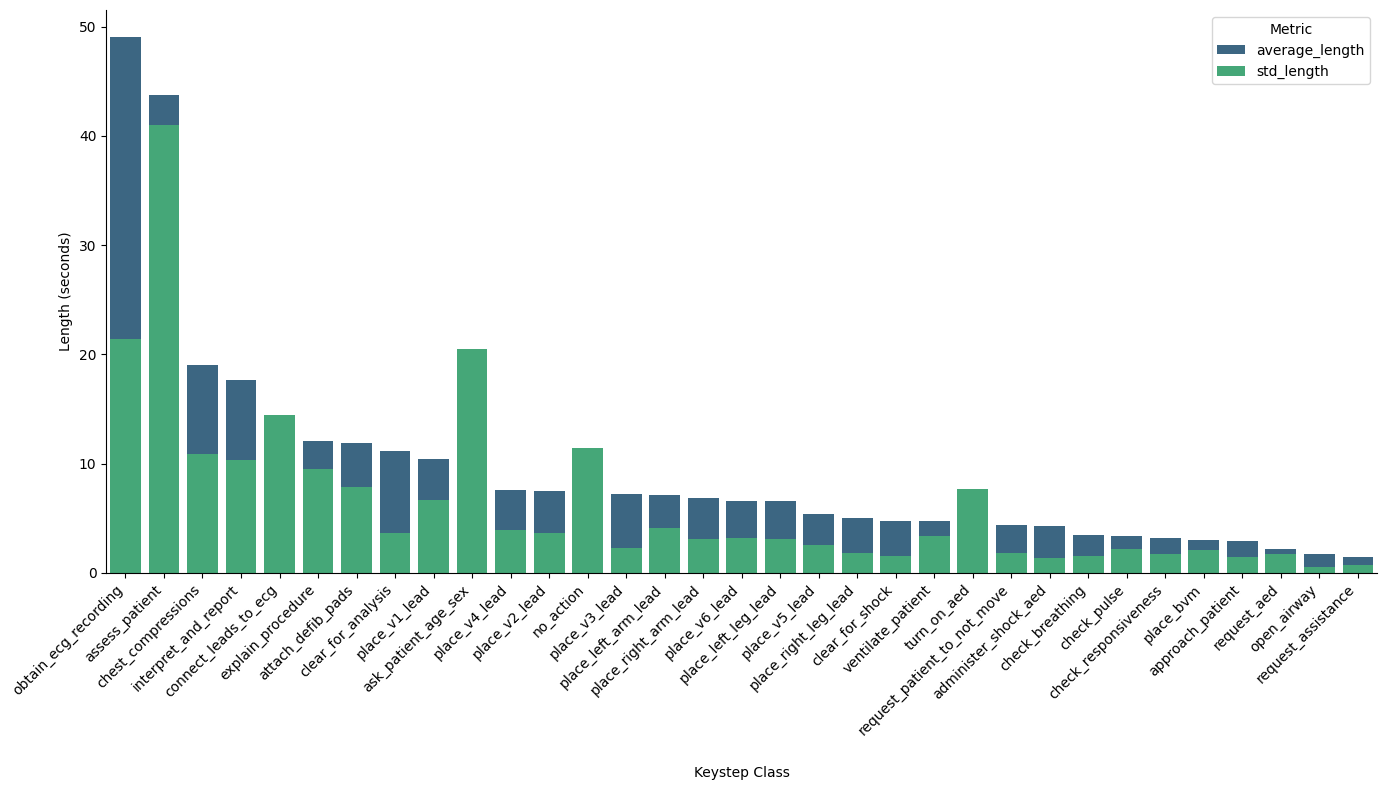

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file

# Melt the DataFrame to make it suitable for a box plot with length stats per class
data = length_stats_by_label
# remove index
data = data.reset_index(drop=True)
# Create barplot
# Set the plot dimensions
plt.figure(figsize=(14, 8))

# Create a stacked bar plot with seaborn
df_melted = data.melt(id_vars="label", value_vars=["average_length", "std_length", ], 
                    var_name="metric", value_name="value")
sns.barplot(x="label", y="value", hue="metric", data=df_melted, dodge=False, palette="viridis")

# Rotate x-axis labels for readability and set spacing
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.labelpad = 20  # Adjust space between bars
plt.gca().set_xticklabels(data["label"], rotation=45, ha='right')  # Set xticks for spacing

# Add labels and title
plt.ylabel("Length (seconds)")
plt.xlabel("Keystep Class")
# plt.title("Average and Standard Deviation of Length by Label")

# hide top and right spine
sns.despine()
plt.legend(title="Metric")

# save the plot
plt.savefig("./plots/average_and_std_length_by_label.png", dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()